<a href="https://colab.research.google.com/github/amitya369/data_science/blob/main/movie_rec_system02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats

In [4]:
# Load the datasets
movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')

In [6]:
# Merge movies and credits datasets on 'id' column
df = movies_df.merge(credits_df, left_on='id', right_on='movie_id')

In [7]:
# Step 1: Data Overview
print("Data Overview:")
(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status

In [8]:
# Check missing values
df.isnull().sum()


,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [9]:

df['homepage'] = df['homepage'].fillna('')
df['tagline'] = df['tagline'].fillna('')


In [10]:
# Fill missing values in 'runtime', 'budget', 'revenue' columns with median (as these are important numerical features)
imputer = SimpleImputer(strategy='median')
df[['runtime', 'budget', 'revenue']] = imputer.fit_transform(df[['runtime', 'budget', 'revenue']])


In [11]:
# Step 3: Categorical Variable Encoding (Label Encoding)
# Encode 'original_language' since it's a categorical feature
label_encoder = LabelEncoder()
df['original_language_encoded'] = label_encoder.fit_transform(df['original_language'])

In [12]:
# Encode 'genres' by extracting the genre names (convert JSON-like format to lists of genres)
import ast

In [13]:
# Extract genre names
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])

# Apply One Hot Encoding to genres
df = df.join(df['genres'].str.join('|').str.get_dummies())


In [14]:
# Step 4: Feature Scaling
# Scale numerical features like 'runtime', 'budget', 'revenue', and 'popularity' using Min-Max Scaling
scaler = MinMaxScaler()
df[['runtime', 'budget', 'revenue', 'popularity']] = scaler.fit_transform(df[['runtime', 'budget', 'revenue', 'popularity']])

In [15]:
# Step 5: Outlier Detection and Handling
# Detect outliers using Z-score method for numerical features
z_scores = np.abs(stats.zscore(df[['runtime', 'budget', 'revenue', 'popularity']]))
outliers = (z_scores > 3)

In [16]:
outliers.sum()

,0
runtime,97
budget,103
revenue,118
popularity,53


In [17]:
# Handling Outliers: Cap extreme outliers
df.loc[outliers.any(axis=1), ['runtime', 'budget', 'revenue', 'popularity']] = df.loc[~outliers.any(axis=1), ['runtime', 'budget', 'revenue', 'popularity']].median()


In [18]:
# Step 6: Check for Final Clean Data
print("\nCleaned Data Overview:")
print(df.describe())

# Step 7: Save Preprocessed Data
df.to_csv('preprocessed_movies.csv', index=False)


Cleaned Data Overview:
            budget             id    popularity      revenue      runtime  \
count  4527.000000    4803.000000  4.527000e+03  4527.000000  4527.000000   
mean      0.063836   57165.484281  2.086976e-02     0.021318     0.313205   
std       0.079829   88694.614033  2.129435e-02     0.033796     0.051107   
min       0.000000       5.000000  4.248606e-07     0.000000     0.121302   
25%       0.001461    9014.500000  5.245906e-03     0.000000     0.275148   
50%       0.034211   14629.000000  1.406282e-02     0.006098     0.304734   
75%       0.092105   58610.500000  2.961991e-02     0.028507     0.343195   
max       0.394737  459488.000000  1.332832e-01     0.202208     0.514793   

       vote_average    vote_count       movie_id  original_language_encoded  \
count   4803.000000   4803.000000    4803.000000                4803.000000   
mean       6.092172    690.217989   57165.484281                   7.482615   
std        1.194612   1234.585891   88694.614

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_movies.csv')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   budget                     4527 non-null   float64
 1   genres                     4803 non-null   object 
 2   homepage                   1712 non-null   object 
 3   id                         4803 non-null   int64  
 4   keywords                   4803 non-null   object 
 5   original_language          4803 non-null   object 
 6   original_title             4803 non-null   object 
 7   overview                   4800 non-null   object 
 8   popularity                 4527 non-null   float64
 9   production_companies       4803 non-null   object 
 10  production_countries       4803 non-null   object 
 11  release_date               4802 non-null   object 
 12  revenue                    4527 non-null   float64
 13  runtime                    4527 non-null   float

In [23]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew',
       'original_language_encoded', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

<ipython-input-26-00d369282da1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='title_x', data=top_10_popular_movies, palette='coolwarm')


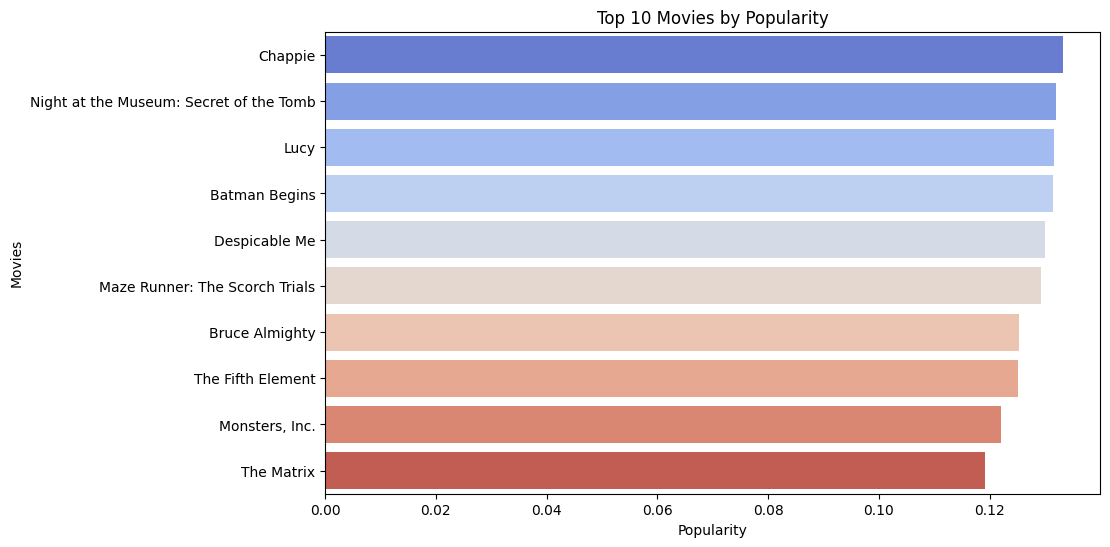

In [26]:

# 1. Bar Graph - Top 10 Movies by Popularity
top_10_popular_movies = df[['title_x', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='title_x', data=top_10_popular_movies, palette='coolwarm')
plt.title("Top 10 Movies by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Movies")
plt.show()

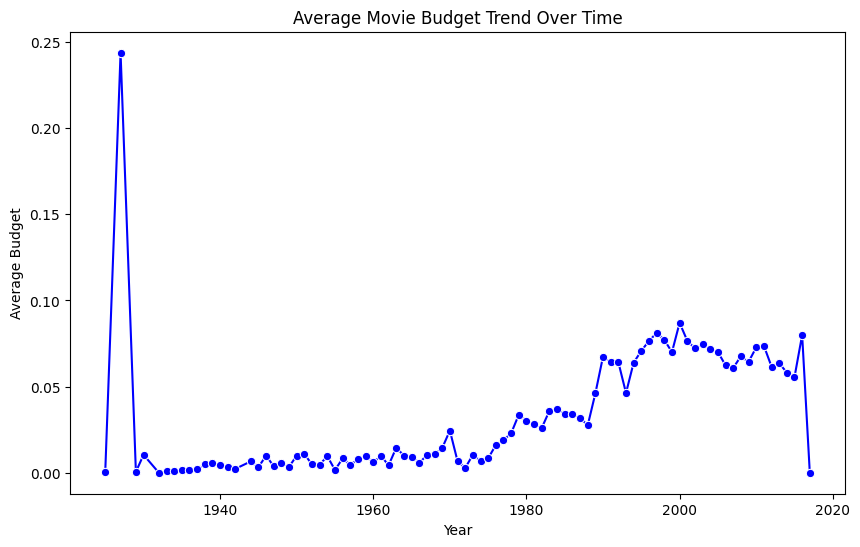

In [27]:
# 2. Line Graph - Budget Trend Over Years
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
yearly_budget = df.groupby('year')['budget'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='budget', data=yearly_budget, marker='o', color='b')
plt.title("Average Movie Budget Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average Budget")
plt.show()

<ipython-input-28-910797010cc4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='runtime', data=df, palette='Set2')


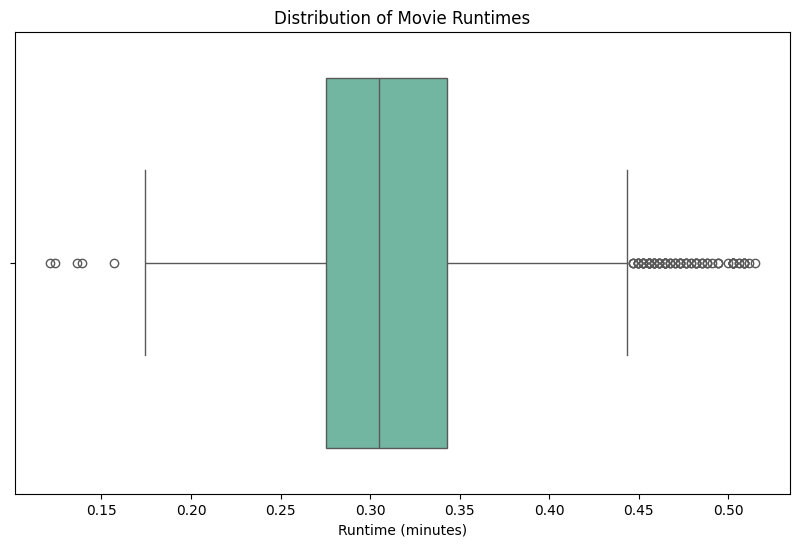

In [28]:
# 3. Box Plot - Distribution of Movie Runtimes
plt.figure(figsize=(10, 6))
sns.boxplot(x='runtime', data=df, palette='Set2')
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.show()


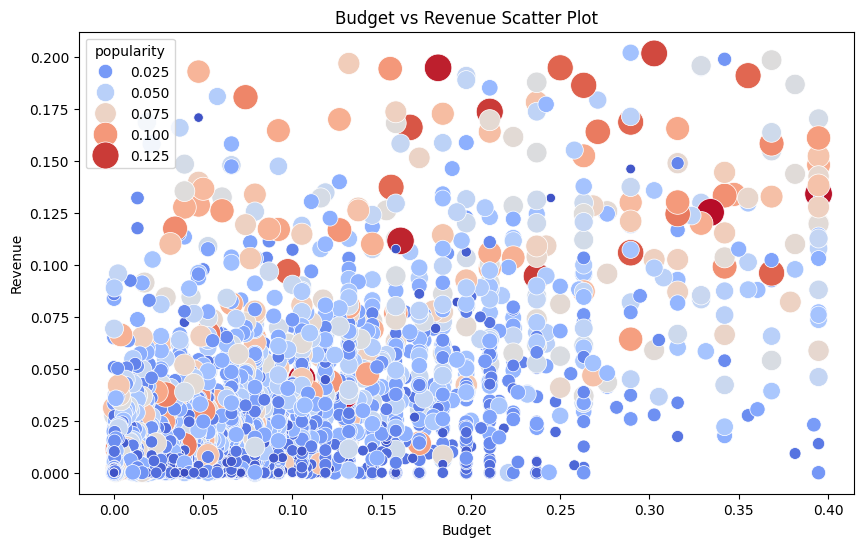

In [29]:
# 4. Scatter Plot - Budget vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, hue='popularity', size='popularity', palette='coolwarm', sizes=(40, 400))
plt.title("Budget vs Revenue Scatter Plot")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()


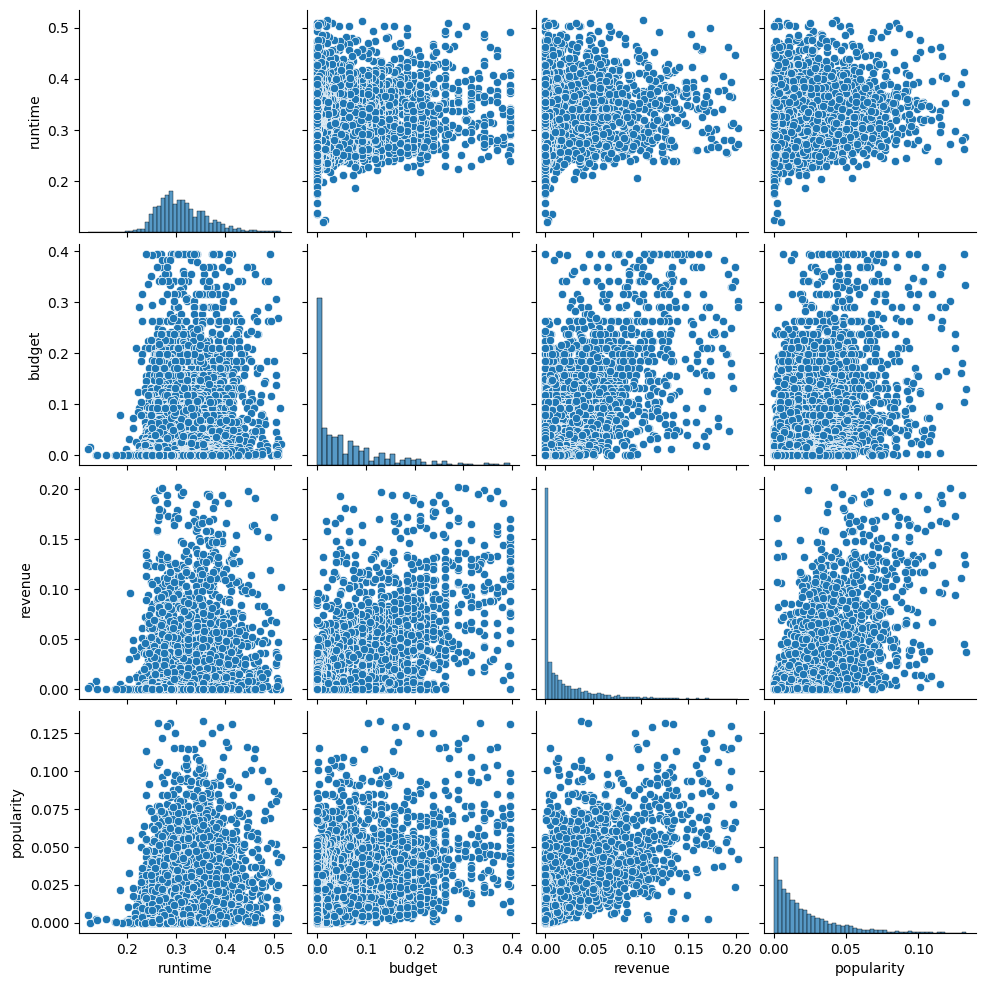

In [30]:
# 5. Pair Plot - Relationships between numerical columns
numerical_cols = ['runtime', 'budget', 'revenue', 'popularity']
sns.pairplot(df[numerical_cols])
plt.show()

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_movies.csv')


In [40]:
# prompt: remove null value from features

# Remove rows with null values in features you're interested in
features_to_check = ['runtime', 'budget', 'revenue', 'popularity']  # Replace with your actual features
df = df.dropna(subset=features_to_check)

# You can also fill null values with a specific strategy (mean, median, etc.) if you want to retain the rows
# imputer = SimpleImputer(strategy='median')
# df[features_to_check] = imputer.fit_transform(df[features_to_check])

# Check for missing values again
print(df.isnull().sum())

budget                          0
genres                          0
homepage                     2980
id                              0
keywords                        0
original_language               0
original_title                  0
overview                        3
popularity                      0
production_companies            0
production_countries            0
release_date                    0
revenue                         0
runtime                         0
spoken_languages                0
status                          0
tagline                       798
title_x                         0
vote_average                    0
vote_count                      0
movie_id                        0
title_y                         0
cast                            0
crew                            0
original_language_encoded       0
Action                          0
Adventure                       0
Animation                       0
Comedy                          0
Crime         

In [42]:

# Remove rows with null values in the 'revenue' column
df = df.dropna(subset=['revenue'])

In [43]:
# Step 1: Prepare the data
# Select features for regression and the target variable (revenue)
features = ['budget', 'runtime', 'popularity']
X = df[features]
y = df['revenue']

In [44]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Step 3: Impute missing values using the mean
# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

In [46]:
# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the same imputer fitted on training data to transform the test data


In [47]:
# Step 4: Fit the Regression Model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

In [48]:
# Step 4: Predict on Test Data
y_pred = linearModel.predict(X_test)


In [49]:
# Step 5: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")


Mean Squared Error (MSE): 0.0005240459913460981
R-Squared (R2): 0.5897113029444958


In [51]:
# Display coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': linearModel.coef_})
print("\nCoefficients:")
print(coefficients)


Coefficients:
      Feature  Coefficient
0      budget     0.175016
1     runtime     0.004027
2  popularity     0.728882
